# Vinos

* En este proyecto vamos a realizar un ejercicio de aprendizaje no supervisado utilizando un csv de vinos

### Librerías utilizadas

* numpy: para operaciones aritméticas
* pandas: para trabajar con dataframes
* matplotlib y seaborn: para visualizaciones gráficas
* sklearn: para trabajar con los algoritmos y algo de preprocesamiento

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Descarga y análisis de la información

* Como dijimos en un principio, vamos a utilizar un dataset de vinos en formato csv para nuestro análisis, a continuación pasamos a descargarlo

In [2]:
df_vino=pd.read_csv('caracteristicas de vino.csv')
df_vino.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df_vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df_vino=df_vino.drop('Vino',axis=1)

In [5]:
df_vino.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df_vino.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

* Como hemos podido comprobar en la primera visualización, nuestros datos están bastante bien tratados y apenas necesitan de preprocesamiento. Vamos a eliminar la columna 'Vino', que simplemente realiza la función de índice y a pasar a normalizar los datos

In [7]:
x=StandardScaler().fit_transform(df_vino)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

* El siguiente paso será ver la correlación que existe entre los diferentes campos de nuestro df

In [8]:
vinos_stand=pd.DataFrame(x,columns=df_vino.keys())
vinos_stand.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


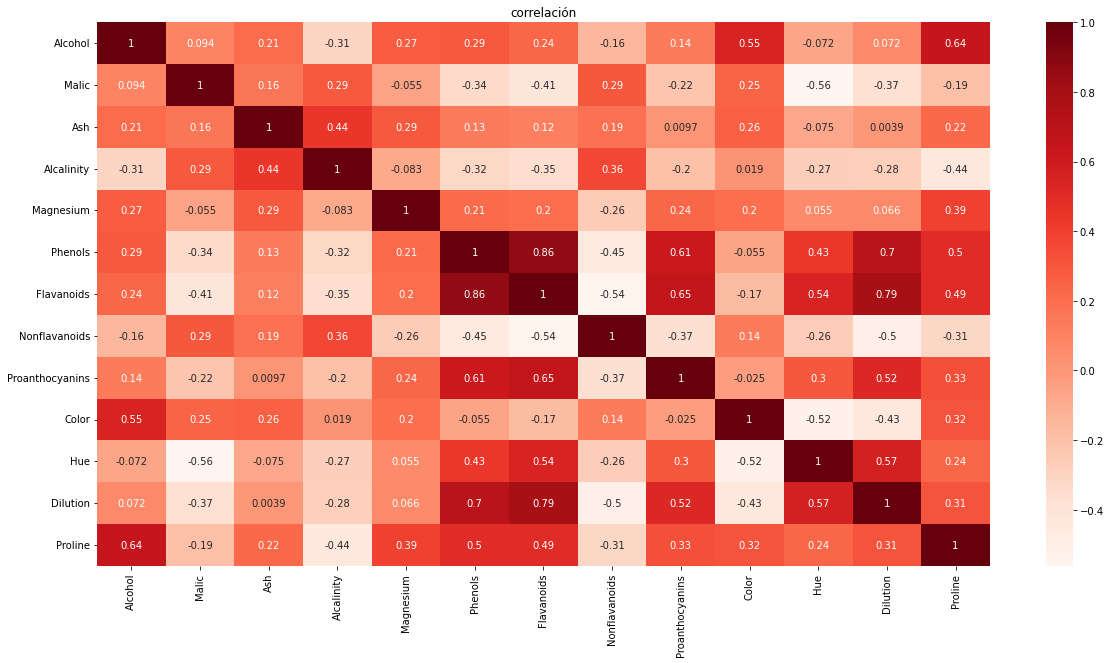

In [9]:
corr=vinos_stand.corr()
fig=plt.subplots(1,figsize=(20,10))
heatmap=sns.heatmap(corr,annot=True,cmap='Reds')
plt.title('correlación')
plt.show()

### Modelo Kmean

* Para clasificar los vinos de los que disponemos en diferentes categorías, vamos a utilizar un modelo de Kmeans. En primer lugar vamos a ver cuál es el número óptimo de cluster para trabajar utilizando la técnica del codo

C:\Users\ricar\.conda\envs\deep learning\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


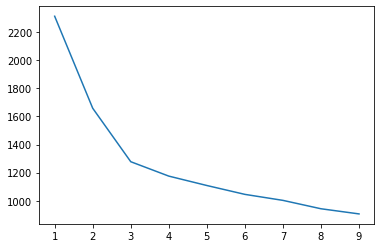

''

In [10]:
cluster=[]
k=range(1,10)
for i in k:
    kmean=KMeans(n_clusters=i)
    kmean.fit(vinos_stand)
    cluster.append(kmean.inertia_)
    
plt.plot(k,cluster)
plt.show()
;

* En el resultado vemos que a partir de los 3 cluster se modera la caída del gráfico, luego clasificaremos nuestros vinos en 3 clases diferentes

In [11]:
modelo=KMeans(n_clusters=3)
modelo.fit(vinos_stand)
centroides,etiquetas=modelo.cluster_centers_,modelo.labels_

* Una vez aplicado el modelo kmeans vamos a añadir los resultados al datframe original, para de esta forma llevar a cabo las conclusiones finales

In [12]:
df_vino['cluster']=etiquetas
df_vino.sample(10)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
13,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,1
75,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428,0
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678,0
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880,1
112,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607,0
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,0
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428,0
41,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035,1
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,2
129,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,0


* Como último paso vamos a visualizar la media de las variables en cada cluster, de esta manera podemos ver entre qué valores se mueven los tipos de vino que hemos clasificado y podemos darles un nombre en función de las características de estos

In [13]:
for i in range(3):
    vino_clust=df_vino[df_vino['cluster']==i]
    vino_clust=vino_clust.describe()
    vino_clust=vino_clust.iloc[1,:]
    print('cluster',i)
    print(vino_clust)

cluster 0
Alcohol             12.250923
Malic                1.897385
Ash                  2.231231
Alcalinity          20.063077
Magnesium           92.738462
Phenols              2.247692
Flavanoids           2.050000
Nonflavanoids        0.357692
Proanthocyanins      1.624154
Color                2.973077
Hue                  1.062708
Dilution             2.803385
Proline            510.169231
cluster              0.000000
Name: mean, dtype: float64
cluster 1
Alcohol              13.676774
Malic                 1.997903
Ash                   2.466290
Alcalinity           17.462903
Magnesium           107.967742
Phenols               2.847581
Flavanoids            3.003226
Nonflavanoids         0.292097
Proanthocyanins       1.922097
Color                 5.453548
Hue                   1.065484
Dilution              3.163387
Proline            1100.225806
cluster               1.000000
Name: mean, dtype: float64
cluster 2
Alcohol             13.134118
Malic                3.307255
As

* En este caso vemos, por ejemplo que los vinos del cluster 3 son los que tienen mayor color y alcalinidad, los del cluster 2 cuentan con mayor magnesio y proline y los del cluster 1 son los que cuentan con menor proporción en todas sus variables

* Con la ayuda de una persona que conozca el campo de los vinos se podría dar algún tipo de etiqueta a cada uno de estos cluster